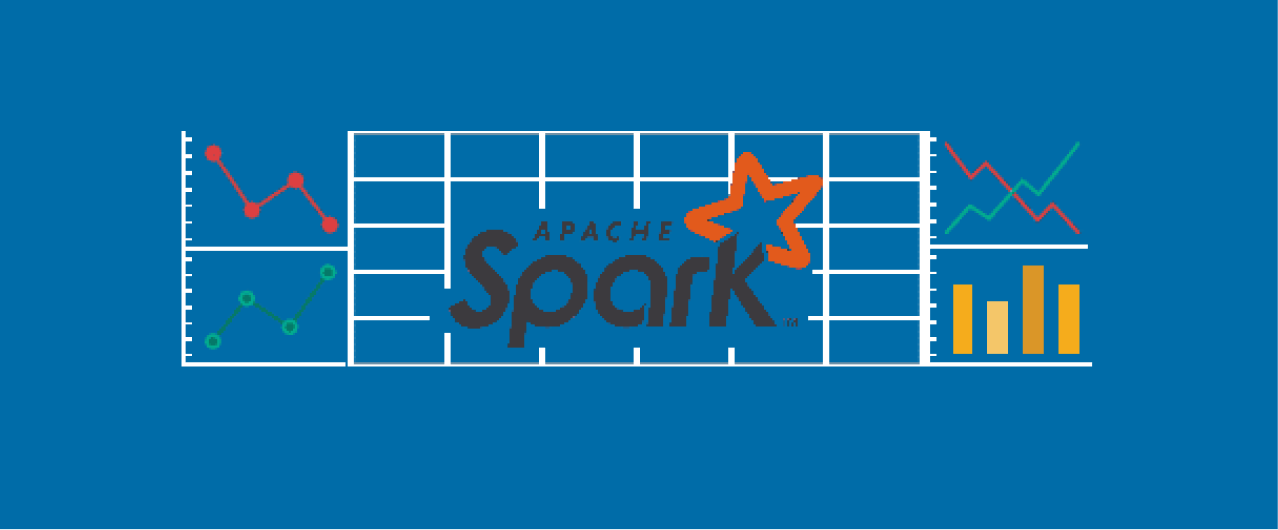

# Spark DataFrame Handling Practice

In [1]:
import pandas as pd
from datetime import date, datetime
from pyspark.sql import *
from pyspark.sql.functions import col, lit, when

In [2]:
#1. 아래 data를 이용해 spark df를 생성하고 변수 df에 저장하시오
stocks = [
    ('Google', 'GOOGL', 'USA', 2984, 'USD'), 
    ('Netflix', 'NFLX', 'USA', 645, 'USD'),
    ('Amazon', 'AMZN', 'USA', 3518, 'USD'),
    ('Tesla', 'TSLA', 'USA', 1222, 'USD'),
    ('Tencent', '0700', 'Hong Kong', 483, 'HKD'),
    ('Toyota', '7203', 'Japan', 2006, 'JPY'),
    ('Samsung', '005930', 'Korea', 70600, 'KRW'),
    ('Kakao', '035720', 'Korea', 125000, 'KRW'),
]
stockSchema = ["name", "ticker", "country", "price", "currency"]

In [3]:
df = spark.createDataFrame(data=stocks, schema=stockSchema)
df.show(3)
df.printSchema()

+-------+------+-------+-----+--------+
|   name|ticker|country|price|currency|
+-------+------+-------+-----+--------+
| Google| GOOGL|    USA| 2984|     USD|
|Netflix|  NFLX|    USA|  645|     USD|
| Amazon|  AMZN|    USA| 3518|     USD|
+-------+------+-------+-----+--------+
only showing top 3 rows

root
 |-- name: string (nullable = true)
 |-- ticker: string (nullable = true)
 |-- country: string (nullable = true)
 |-- price: long (nullable = true)
 |-- currency: string (nullable = true)



In [35]:
#2. 변수 df의 컬럼별 type을 확인하시오(tip. dtypes 속성 활용)

In [4]:
df.dtypes

[('name', 'string'),
 ('ticker', 'string'),
 ('country', 'string'),
 ('price', 'bigint'),
 ('currency', 'string')]

In [37]:
#3. df를 출력하여 내용을 확인 하시오

In [5]:
df.show(10)

+-------+------+---------+------+--------+
|   name|ticker|  country| price|currency|
+-------+------+---------+------+--------+
| Google| GOOGL|      USA|  2984|     USD|
|Netflix|  NFLX|      USA|   645|     USD|
| Amazon|  AMZN|      USA|  3518|     USD|
|  Tesla|  TSLA|      USA|  1222|     USD|
|Tencent|  0700|Hong Kong|   483|     HKD|
| Toyota|  7203|    Japan|  2006|     JPY|
|Samsung|005930|    Korea| 70600|     KRW|
|  Kakao|035720|    Korea|125000|     KRW|
+-------+------+---------+------+--------+



In [ ]:
#3_1. df를 출력하여 내용을 확인 하되 모든 컬럼의 출력 글자수를 2로 제한하시오

In [6]:
df.show(5, truncate=2)

+----+------+-------+-----+--------+
|name|ticker|country|price|currency|
+----+------+-------+-----+--------+
|  Go|    GO|     US|   29|      US|
|  Ne|    NF|     US|   64|      US|
|  Am|    AM|     US|   35|      US|
|  Te|    TS|     US|   12|      US|
|  Te|    07|     Ho|   48|      HK|
+----+------+-------+-----+--------+
only showing top 5 rows



In [ ]:
#3_2. df를 출력하여 내용을 확인 하되 레코드별로 세로로 출력하시오

In [7]:
df.show(3, vertical=True)

-RECORD 0-----------
 name     | Google  
 ticker   | GOOGL   
 country  | USA     
 price    | 2984    
 currency | USD     
-RECORD 1-----------
 name     | Netflix 
 ticker   | NFLX    
 country  | USA     
 price    | 645     
 currency | USD     
-RECORD 2-----------
 name     | Amazon  
 ticker   | AMZN    
 country  | USA     
 price    | 3518    
 currency | USD     
only showing top 3 rows



In [39]:
#4. df에 mn_trade_v 컬럼을 추가하시오

In [8]:
df.withColumn('mn_trade_v', lit('')).show()

+-------+------+---------+------+--------+----------+
|   name|ticker|  country| price|currency|mn_trade_v|
+-------+------+---------+------+--------+----------+
| Google| GOOGL|      USA|  2984|     USD|          |
|Netflix|  NFLX|      USA|   645|     USD|          |
| Amazon|  AMZN|      USA|  3518|     USD|          |
|  Tesla|  TSLA|      USA|  1222|     USD|          |
|Tencent|  0700|Hong Kong|   483|     HKD|          |
| Toyota|  7203|    Japan|  2006|     JPY|          |
|Samsung|005930|    Korea| 70600|     KRW|          |
|  Kakao|035720|    Korea|125000|     KRW|          |
+-------+------+---------+------+--------+----------+



In [9]:
df.show()

+-------+------+---------+------+--------+
|   name|ticker|  country| price|currency|
+-------+------+---------+------+--------+
| Google| GOOGL|      USA|  2984|     USD|
|Netflix|  NFLX|      USA|   645|     USD|
| Amazon|  AMZN|      USA|  3518|     USD|
|  Tesla|  TSLA|      USA|  1222|     USD|
|Tencent|  0700|Hong Kong|   483|     HKD|
| Toyota|  7203|    Japan|  2006|     JPY|
|Samsung|005930|    Korea| 70600|     KRW|
|  Kakao|035720|    Korea|125000|     KRW|
+-------+------+---------+------+--------+



In [27]:
#4. df에 qty 컬럼을 추가하되 값을 0으로 초기화 하시오

In [10]:
df.withColumn('qty', lit('0')).show()

+-------+------+---------+------+--------+---+
|   name|ticker|  country| price|currency|qty|
+-------+------+---------+------+--------+---+
| Google| GOOGL|      USA|  2984|     USD|  0|
|Netflix|  NFLX|      USA|   645|     USD|  0|
| Amazon|  AMZN|      USA|  3518|     USD|  0|
|  Tesla|  TSLA|      USA|  1222|     USD|  0|
|Tencent|  0700|Hong Kong|   483|     HKD|  0|
| Toyota|  7203|    Japan|  2006|     JPY|  0|
|Samsung|005930|    Korea| 70600|     KRW|  0|
|  Kakao|035720|    Korea|125000|     KRW|  0|
+-------+------+---------+------+--------+---+



In [11]:
df.show()

+-------+------+---------+------+--------+
|   name|ticker|  country| price|currency|
+-------+------+---------+------+--------+
| Google| GOOGL|      USA|  2984|     USD|
|Netflix|  NFLX|      USA|   645|     USD|
| Amazon|  AMZN|      USA|  3518|     USD|
|  Tesla|  TSLA|      USA|  1222|     USD|
|Tencent|  0700|Hong Kong|   483|     HKD|
| Toyota|  7203|    Japan|  2006|     JPY|
|Samsung|005930|    Korea| 70600|     KRW|
|  Kakao|035720|    Korea|125000|     KRW|
+-------+------+---------+------+--------+



In [30]:
#5. df에 qty 컬럼을 추가하되 값을 0으로 초기화하고 df에 저장하시오

In [12]:
df = df.withColumn('qty', lit('0'))
df.show()

+-------+------+---------+------+--------+---+
|   name|ticker|  country| price|currency|qty|
+-------+------+---------+------+--------+---+
| Google| GOOGL|      USA|  2984|     USD|  0|
|Netflix|  NFLX|      USA|   645|     USD|  0|
| Amazon|  AMZN|      USA|  3518|     USD|  0|
|  Tesla|  TSLA|      USA|  1222|     USD|  0|
|Tencent|  0700|Hong Kong|   483|     HKD|  0|
| Toyota|  7203|    Japan|  2006|     JPY|  0|
|Samsung|005930|    Korea| 70600|     KRW|  0|
|  Kakao|035720|    Korea|125000|     KRW|  0|
+-------+------+---------+------+--------+---+



In [ ]:
#6. df의 qty 변수에 대하여 country가 usa 면 100 hong kong 은 500 japan은 100,
# 한국은 1 로 설정하고 df_tmp에 저장하시오

In [13]:
df_tmp = df.withColumn('qty', when((df.country == 'USA') | (df.country == 'Japan'), 100)
                              .when(df.country == 'Hong Kong', 500)
                              .when(df.country == 'Korea', 1)
                              # .otherwise(1)
                        )
df_tmp.show()

+-------+------+---------+------+--------+---+
|   name|ticker|  country| price|currency|qty|
+-------+------+---------+------+--------+---+
| Google| GOOGL|      USA|  2984|     USD|100|
|Netflix|  NFLX|      USA|   645|     USD|100|
| Amazon|  AMZN|      USA|  3518|     USD|100|
|  Tesla|  TSLA|      USA|  1222|     USD|100|
|Tencent|  0700|Hong Kong|   483|     HKD|500|
| Toyota|  7203|    Japan|  2006|     JPY|100|
|Samsung|005930|    Korea| 70600|     KRW|  1|
|  Kakao|035720|    Korea|125000|     KRW|  1|
+-------+------+---------+------+--------+---+



In [ ]:
#7. df_tmp의 컬럼명을 종목, 종목코드, 국가, 현재가,통화, 최소거래량으로 변경하시오 

In [14]:
df_tmp = df_tmp.withColumnRenamed('name', '종목')\
        .withColumnRenamed('ticker', '종목코드')\
        .withColumnRenamed('country', '국가')\
        .withColumnRenamed('price', '현재가')\
        .withColumnRenamed('currency', '통화')\
        .withColumnRenamed('qty', '최소거래량')
df_tmp.show()

+-------+--------+---------+------+----+----------+
|   종목|종목코드|     국가|현재가|통화|최소거래량|
+-------+--------+---------+------+----+----------+
| Google|   GOOGL|      USA|  2984| USD|       100|
|Netflix|    NFLX|      USA|   645| USD|       100|
| Amazon|    AMZN|      USA|  3518| USD|       100|
|  Tesla|    TSLA|      USA|  1222| USD|       100|
|Tencent|    0700|Hong Kong|   483| HKD|       500|
| Toyota|    7203|    Japan|  2006| JPY|       100|
|Samsung|  005930|    Korea| 70600| KRW|         1|
|  Kakao|  035720|    Korea|125000| KRW|         1|
+-------+--------+---------+------+----+----------+



In [ ]:
#8.df_tmp의 최소 거래량 컬럼을 삭제하시오

In [15]:
df_tmp = df_tmp.drop('최소거래량')
df_tmp.show()

+-------+--------+---------+------+----+
|   종목|종목코드|     국가|현재가|통화|
+-------+--------+---------+------+----+
| Google|   GOOGL|      USA|  2984| USD|
|Netflix|    NFLX|      USA|   645| USD|
| Amazon|    AMZN|      USA|  3518| USD|
|  Tesla|    TSLA|      USA|  1222| USD|
|Tencent|    0700|Hong Kong|   483| HKD|
| Toyota|    7203|    Japan|  2006| JPY|
|Samsung|  005930|    Korea| 70600| KRW|
|  Kakao|  035720|    Korea|125000| KRW|
+-------+--------+---------+------+----+

